# Анализ вебинарной воронки


1 августа прошел продающий бесплатный вебинар, на котором была продающая часть (с описанием всех плюсов нашей школы) и часть спикера-аналитика (с описанием профессии и практикой).

Ваша задача - проанализировать эффективность данного вебинара.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time
from datetime import datetime
from scipy.stats import spearmanr

In [2]:
#Импорт файлов

logs = pd.read_csv('logs.csv', sep=';')
clients = pd.read_csv('clients.csv', sep=';')
vk_reg = pd.read_csv('vk_reg.csv', sep=';')
tg_reg = pd.read_csv('tg_reg.csv', sep=';')
inst_reg = pd.read_csv('inst_reg.csv', sep=';')
fb_reg = pd.read_csv('fb_reg.csv', sep=';')
email_reg = pd.read_csv('email_reg.csv', sep=';')

In [3]:
logs.head()

,id_webinar,id_user,t_came,t_left
0,1341312,34217410,01.08.2022 12:25,01.08.22 13:00
1,1341312,34322153,01.08.2022 12:03,01.08.22 12:23
2,1341312,34386258,01.08.2022 12:43,01.08.22 13:14
3,1341312,34323708,01.08.2022 12:02,01.08.22 12:21
4,1341312,34316732,01.08.2022 12:02,01.08.22 12:24


In [4]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_webinar  1435 non-null   int64 
 1   id_user     1435 non-null   int64 
 2   t_came      1435 non-null   object
 3   t_left      1435 non-null   object
dtypes: int64(2), object(2)
memory usage: 45.0+ KB


In [5]:
#Переводим время к нужному типу данных
logs['t_left'] = pd.to_datetime(logs['t_left'], format='mixed')
logs['t_came'] = pd.to_datetime(logs['t_came'], format='mixed')

In [6]:
logs.head()

,id_webinar,id_user,t_came,t_left
0,1341312,34217410,2022-01-08 12:25:00,2022-01-08 13:00:00
1,1341312,34322153,2022-01-08 12:03:00,2022-01-08 12:23:00
2,1341312,34386258,2022-01-08 12:43:00,2022-01-08 13:14:00
3,1341312,34323708,2022-01-08 12:02:00,2022-01-08 12:21:00
4,1341312,34316732,2022-01-08 12:02:00,2022-01-08 12:24:00


In [7]:
#Группируем по лейблам для различных источников привлечения

tg_reg_gr = tg_reg.groupby('public_label').count()['time_reg'].reset_index()
tg_reg_gr['label'] = 'telegram'
tg_reg_gr['source_fin'] = tg_reg_gr['label'] + "_" + tg_reg_gr['public_label']

inst_reg_gr = inst_reg.groupby('blogger_label').count()['time_reg'].reset_index()
inst_reg_gr['label'] = 'instagram'
inst_reg_gr['source_fin'] = inst_reg_gr['label'] + "_" + inst_reg_gr['blogger_label']

fb_reg_gr = fb_reg.groupby('source_label').count()['time_reg'].reset_index()
fb_reg_gr['label'] = 'facebook'
fb_reg_gr['source_fin'] = fb_reg_gr['label'] + "_" + fb_reg_gr['source_label']

email_reg_gr = email_reg.groupby('domain_label').count()['time_reg'].reset_index()
email_reg_gr['label'] = 'email'
email_reg_gr['source_fin'] = email_reg_gr['label'] + "_" + email_reg_gr['domain_label']

vk_reg_gr = vk_reg.groupby('group_label').count()['time_reg'].reset_index()
vk_reg_gr['label'] = 'vkontakte'
vk_reg_gr['source_fin'] = vk_reg_gr['label'] + "_" + vk_reg_gr['group_label']

In [8]:
#Объеденение агрегаций каналов привлечения

union_reg_gr = pd.concat([tg_reg_gr, inst_reg_gr, fb_reg_gr, email_reg_gr, vk_reg_gr])[['label','source_fin','time_reg']]

In [9]:
union_reg_gr.head(10)

,label,source_fin,time_reg
0,telegram,telegram_public1,1440
1,telegram,telegram_public2,869
2,telegram,telegram_public3,770
3,telegram,telegram_public4,131
0,instagram,instagram_blogger1,1611
1,instagram,instagram_blogger2,841
2,instagram,instagram_blogger3,743
3,instagram,instagram_blogger4,2060
0,facebook,facebook_source1,671
1,facebook,facebook_source2,1028


In [10]:
clients.head()

,id_user,source
0,34214513,?utm_source=telegram%adv=public1W%WSJ%3543%A
1,34432122,?utm_source=instagram%placement=blogger4I%FPY%...
2,34332094,?utm_source=telegram%adv=public1W%VRI%6516%J
3,34273819,?utm_source=telegram%adv=public3M%HSJ%6142%K
4,34385079,?utm_source=facebook%fbadv=source2R%TIY%8021%C


In [11]:
#Систематизируем информацию из поля 'source' таблицы 'clients'

clients['source_mjr'] = clients['source'].str.split('=').str[1].str.split('%').str[0]
clients['source_mnr'] = clients['source'].str.split('=').str[2].str.split('%').str[0].str[:-1]

clients['source_fin'] = clients['source_mjr'] + "_" + clients['source_mnr']

In [12]:
clients.head()

,id_user,source,source_mjr,source_mnr,source_fin
0,34214513,?utm_source=telegram%adv=public1W%WSJ%3543%A,telegram,public1,telegram_public1
1,34432122,?utm_source=instagram%placement=blogger4I%FPY%...,instagram,blogger4,instagram_blogger4
2,34332094,?utm_source=telegram%adv=public1W%VRI%6516%J,telegram,public1,telegram_public1
3,34273819,?utm_source=telegram%adv=public3M%HSJ%6142%K,telegram,public3,telegram_public3
4,34385079,?utm_source=facebook%fbadv=source2R%TIY%8021%C,facebook,source2,facebook_source2


In [13]:
#Группируем по каналам привлечения зарегистрировынных
clients_gr = clients.groupby('source_fin').count()['id_user'].reset_index()

In [14]:
clients_gr.head(15)

,source_fin,id_user
0,email_gmail,65
1,email_outlook,39
2,email_yandex,80
3,facebook_source1,47
4,facebook_source2,100
5,facebook_source3,91
6,instagram_blogger1,157
7,instagram_blogger2,90
8,instagram_blogger3,75
9,instagram_blogger4,67


In [15]:
#Объеденяем таблицы зарегестрированных и посетивших 
df = clients_gr.merge(union_reg_gr, on = 'source_fin')

df = df.rename(columns = {'id_user':'cnt_come', 'time_reg':'cnt_reg'})[['label','source_fin','cnt_reg','cnt_come']]
df['reg2come'] = (df['cnt_come'] / df['cnt_reg']) * 100

In [16]:
#И смотрим на конверсию из регистрации в посещение
df.style.background_gradient(cmap='Greens', axis=0, subset=['reg2come'])

,label,source_fin,cnt_reg,cnt_come,reg2come
0,email,email_gmail,1170,65,5.555556
1,email,email_outlook,1000,39,3.900000
2,email,email_yandex,958,80,8.350731
3,facebook,facebook_source1,671,47,7.004471
4,facebook,facebook_source2,1028,100,9.727626
5,facebook,facebook_source3,964,91,9.439834
6,instagram,instagram_blogger1,1611,157,9.745500
7,instagram,instagram_blogger2,841,90,10.701546
8,instagram,instagram_blogger3,743,75,10.094213
9,instagram,instagram_blogger4,2060,67,3.252427


In [17]:
# Исследуем время входа, выхода и присутсвия
logs['length'] = logs['t_left'] - logs['t_came']

In [18]:
logs['length'].min()

Timedelta('-1 days +23:22:00')

In [19]:
#Удаляем отрицательные значения
logs = logs[logs['length'].apply(lambda x: x.total_seconds() >= 0)]

In [20]:
#Группируем посетивших по времени прихода и выхода
#И рассмотрим на графиках динамику
logs_exit = logs.groupby('t_left').count()['id_user'].reset_index()
logs_enter = logs.groupby('t_came').count()['id_user'].reset_index()

In [21]:
# Расписание вебинара:
#     Начало первого продающего блока: 12:00
#     Начало теоретического блока про аналитику: 12:15
#     Начало второй продающей части: 12:50
#     Начало практического блока про аналитику: 13:05
#     Окончание вебинара: 14:00

In [22]:
time_1 = datetime(2022, 1, 8, 12, 15, 00)
time_2 = datetime(2022, 1, 8, 12, 50, 00)
time_3 = datetime(2022, 1, 8, 13, 5, 00)

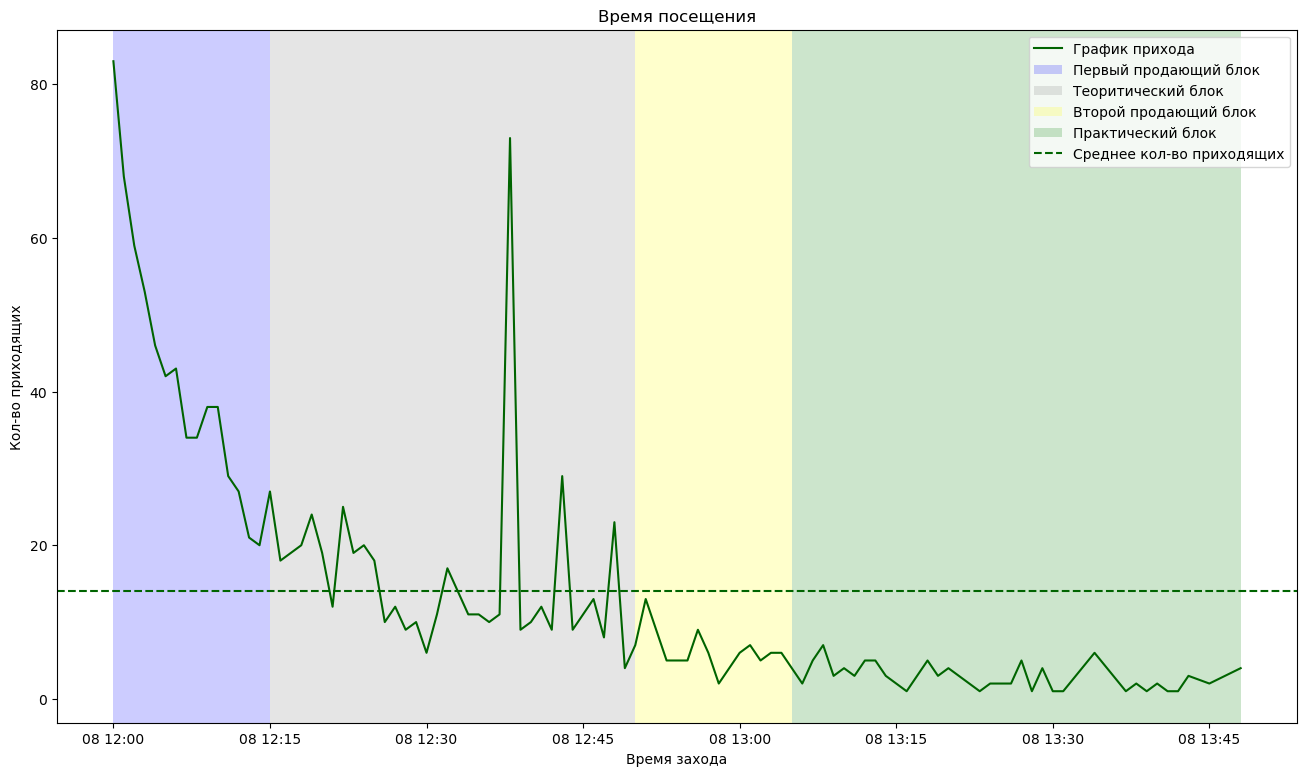

In [23]:
plt.figure(figsize=(16,9))
plt.title('Время посещения')
plt.xlabel('Время захода')
plt.ylabel('Кол-во приходящиx', rotation=90)
plt.plot(logs_enter['t_came'], logs_enter['id_user'], color = 'darkgreen', label='График прихода')
plt.axvspan(xmin=logs_enter['t_came'].min(), xmax=time_1, facecolor='blue', alpha=0.2, label='Первый продающий блок')
plt.axvspan(xmin=time_1, xmax=time_2, facecolor='grey', alpha=0.2, label='Теоритический блок')
plt.axvspan(xmin=time_2, xmax=time_3, facecolor='yellow', alpha=0.2, label='Второй продающий блок')
plt.axvspan(xmin=time_3, xmax=logs_enter['t_came'].max(), facecolor='green', alpha=0.2, label='Практический блок')
plt.axhline(y=logs_enter['id_user'].mean(), color='darkgreen', linestyle='--', label='Среднее кол-во приходящих')
plt.legend(loc='best')
plt.show()

По выбросу на графике в Теоритическом блоке видно как резко возросло кол-во приходящих

Явно показывает работу дополнительной рыссылки с напоминанием о вебинаре

In [25]:
#Выделим время с самым большим оттоком для отображения на графике ухода
top5 = list(logs_exit.sort_values(['id_user'], ascending=False)['t_left'].head(5))

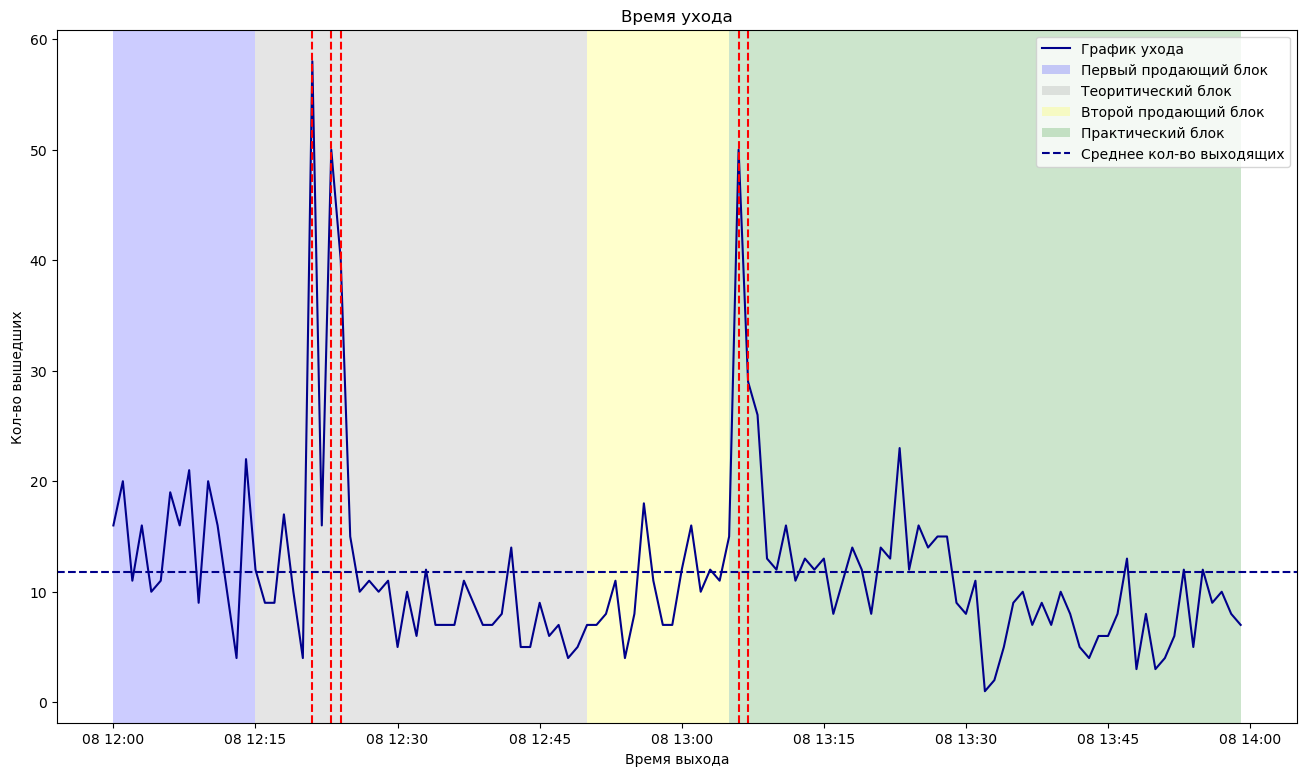

In [26]:
plt.figure(figsize=(16,9))
plt.title('Время ухода')
plt.xlabel('Время выхода')
plt.ylabel('Кол-во вышедших', rotation=90)
plt.plot(logs_exit['t_left'], logs_exit['id_user'], color='darkblue', label='График ухода')
for i in top5:
    plt.axvline(x = i, color='red', linestyle='--')
plt.axvspan(xmin=logs_exit['t_left'].min(), xmax=time_1, facecolor='blue', alpha=0.2, label='Первый продающий блок')
plt.axvspan(xmin=time_1, xmax=time_2, facecolor='grey', alpha=0.2, label='Теоритический блок')
plt.axvspan(xmin=time_2, xmax=time_3, facecolor='yellow', alpha=0.2, label='Второй продающий блок')
plt.axvspan(xmin=time_3, xmax=logs_exit['t_left'].max(), facecolor='green', alpha=0.2, label='Практический блок')
plt.axhline(y=logs_exit['id_user'].mean(), color='darkblue', linestyle='--', label='Среднее кол-во выходящих')
plt.legend(loc='best')
plt.show()

На графике ухода видим выбросы в теоритическом и начале практического блока

Будем рекомендовать спикеру-аналитику улучшить эти блоки

Так же рассмотрим зависит ли время, в течение которого клиент остается на вебинаре, от его канала привлечения

In [29]:
def blocs(f):
    if f < time_1:
        return 'Первый продающий блок'
    elif f < time_2:
        return 'Теоритический блок'
    elif f < time_3:
        return 'Второй продающий блок'
    else:
        return 'Практический блок'        

In [30]:
#Создадим дополнительные колонки с блоками прихода и ухода
logs['bloc_came'] = logs['t_came'].apply(blocs)
logs['bloc_left'] = logs['t_left'].apply(blocs)

In [31]:
logs.head(5)

,id_webinar,id_user,t_came,t_left,length,bloc_came,bloc_left
0,1341312,34217410,2022-01-08 12:25:00,2022-01-08 13:00:00,0 days 00:35:00,Теоритический блок,Второй продающий блок
1,1341312,34322153,2022-01-08 12:03:00,2022-01-08 12:23:00,0 days 00:20:00,Первый продающий блок,Теоритический блок
2,1341312,34386258,2022-01-08 12:43:00,2022-01-08 13:14:00,0 days 00:31:00,Теоритический блок,Практический блок
3,1341312,34323708,2022-01-08 12:02:00,2022-01-08 12:21:00,0 days 00:19:00,Первый продающий блок,Теоритический блок
4,1341312,34316732,2022-01-08 12:02:00,2022-01-08 12:24:00,0 days 00:22:00,Первый продающий блок,Теоритический блок


In [32]:
#Переведем время присутсвия в минуты 
logs['length'] = logs['length'].apply(lambda x : x.total_seconds() / 60)

In [33]:
#И добавим в таблицу канал привлечения
logs = pd.merge(logs,
                clients[['id_user','source_fin']],
                on = 'id_user'
                )

In [34]:
#Группируем по каналу привлечения и смотрим на среднее время
source_fin_gr = logs.groupby('source_fin')['length'].mean().reset_index()

In [35]:
source_fin_gr.style.background_gradient(cmap='Blues', axis=0, subset=['length'])

,source_fin,length
0,email_gmail,27.854839
1,email_outlook,26.583333
2,email_yandex,29.629630
3,facebook_source1,27.764706
4,facebook_source2,24.650407
5,facebook_source3,29.810526
6,instagram_blogger1,26.670807
7,instagram_blogger2,27.404255
8,instagram_blogger3,29.714286
9,instagram_blogger4,33.348315


In [36]:
#Для исследования корреляция между каналами привлечения и временем на вебинаре возьмем данные по конверсии 
low_lvl, high_lvl = df['reg2come'].quantile([0.01, 0.99])
#Предварительно очистим данные от выбросов 
df_ = df[(df['reg2come'] >= low_lvl) & (df['reg2come'] <= high_lvl)]

In [37]:
#Объединяем таблицы по каналам привлечения
df_ = df_.merge(source_fin_gr, on = 'source_fin')

In [38]:
#Для оценки связи воспользуемся Коэффициентом корреляции Спирмена
cor, p_value = spearmanr(df_['reg2come'], df_['length'])
print('Коэффициент корреляции Спирмена', cor)

Коэффициент корреляции Спирмена 0.07252747252747253


Коэффициент ниже 0.1 , следует что корреляция очень слабая
Заключаем что время на вебинаре клиента не зависит от канала его привлечения

In [40]:
#Рассмотрим долю вышедших к входящим клиентов по блокам
#Исходя из графика для завершающего блока возьмем только его первую половину, т.к во второй частии кол-во выходящих пададает ниже среднего   
logs_gr_came = logs.groupby('bloc_came').agg(cnt_came = ('id_user', 'count'), time = ('t_came', 'min')).sort_values(['time']).reset_index()
logs_gr_left = logs[logs['t_left'] <= datetime(2022, 1, 8, 13,30,00)].groupby('bloc_left').agg(cnt_left = ('id_user', 'count'), time = ('t_left', 'min')).sort_values(['time']).reset_index()
logs_gr_union = pd.merge(logs_gr_came, logs_gr_left, left_on = 'bloc_came', right_on = 'bloc_left')[['bloc_came', 'cnt_came', 'cnt_left']]

In [41]:
logs_gr_union['%_left'] = ""

In [42]:
sum_c = 0
sum_l = 0
for i in range(0, 4):
    sum_c += logs_gr_union.iloc[i]['cnt_came']
    logs_gr_union.at[i, '%_left'] = logs_gr_union.iloc[i]['cnt_left'] / (sum_c - sum_l) * 100
    sum_l += logs_gr_union.iloc[i]['cnt_left']

In [43]:
logs_gr_union.style.background_gradient(cmap='Reds', axis=0, subset=['%_left'])

,bloc_came,cnt_came,cnt_left,%_left
0,Первый продающий блок,635,211,33.228346
1,Теоритический блок,563,433,43.870314
2,Второй продающий блок,95,149,22.958398
3,Практический блок,99,391,65.275459


Подтверждаем график, в теоритический и практический блоки приходится значительная доля выходящих.